In [62]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw()                                        # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True)   # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True)    # List of selected files will be set button's file attribute.
    print(b.files)                                         # Print the list of files selected.
    
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

('D:/jupyter_notebooks/Edusecrets/data/L4/spec_520.95.dat',)


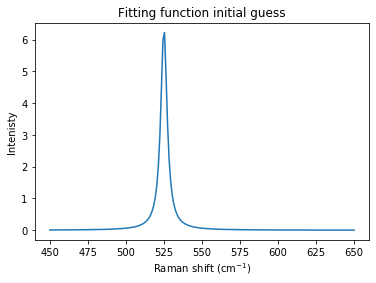

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# The Lorentz function
def lorentz(x, y0, amp, cen, wid):
    return y0 + (2*amp/np.pi)*(wid/(4*(x-cen)**2 + wid**2))

xtest = np.linspace(450,650,200)
y0 = 0
amp = 50
cen = 525
wid = 5

ytest = lorentz(xtest,y0,amp,cen, wid)
plt.plot(xtest,ytest)
plt.title("Fitting function initial guess")
plt.ylabel("Intenisty")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.show()

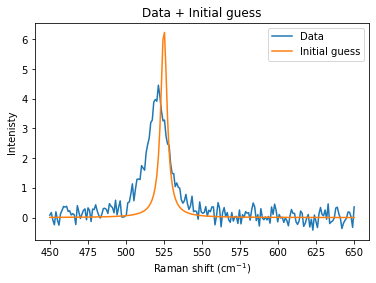

In [79]:
f = fileselect.files
i = 0

head,tail = os.path.split(f[i])

dataread = pd.read_csv(f[i], header=None, sep=None, engine="python").values
xdata = dataread[:,0]
ydata = dataread[:,1]

plt.plot(xdata,ydata, label="Data")
plt.plot(xtest,ytest, label="Initial guess")
plt.title("Data + Initial guess")
plt.ylabel("Intenisty")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.legend()
plt.show()

[3.29114486e-22 9.97775361e+01 5.20822454e+02 1.52034939e+01]


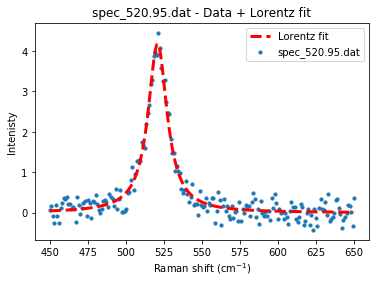

In [80]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(lorentz, xdata, ydata, bounds=([0,50,500,10],[1,200,530,30]))

plt.scatter(xdata, ydata, s=10, label=tail)
plt.plot(xdata, lorentz(xdata, *popt), 'r--', linewidth=3, label="Lorentz fit")
plt.title("{} - Data + Lorentz fit".format(tail))
plt.ylabel("Intenisty")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.legend()
print(popt)